In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn
import os

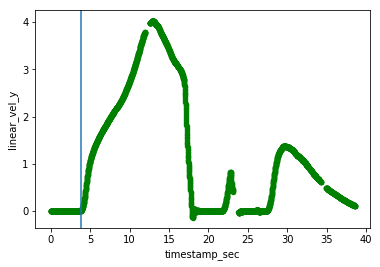

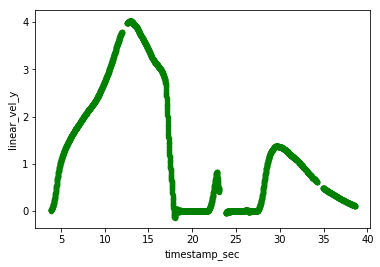

In [44]:
# Script for parsing from GoMentum cyberbag's csv
scenario_path = "./LG_DATA/January_GoMentum/F5-Run4"

ego_table_files = sorted([file for file in os.listdir(scenario_path) if file.endswith('ego.csv')])
ego_table_list  = []
for file in ego_table_files:
    path_to_file = os.path.join(scenario_path, file)
    ego_table_list.append(pd.read_csv(path_to_file, sep=';'))
ego_table     = pd.concat(ego_table_list, ignore_index=True)
ego_table.sort_values(by=['timestamp_sec'])

ego_table['timestamp_sec'] = ego_table['timestamp_sec'] - ego_table['timestamp_sec'][0]

start_time = -1
start_index = 0
for index, row in ego_table.iterrows():
    start_index +=1
    if row['linear_vel_y'] > 0.01:
        start_time = row['timestamp_sec']
        break

ax = ego_table.plot(kind='scatter',x='timestamp_sec', y='linear_vel_y',color='green')
plt.axvline(start_time)
plt.show()

ego_table_from_start = ego_table[start_index-1:]
ego_table_from_start.plot(kind='scatter',x='timestamp_sec', y='linear_vel_y',color='green')
plt.show()

ego_table_to_save = ego_table_from_start[['timestamp_sec','position_x','position_y','heading']]

path_to_save = os.path.join(scenario_path,'GoMentum_F5_Run4_ego_from_start.csv')
ego_table_to_save.to_csv(path_to_save)



In [58]:
# Script for parsing from simulation cyberbag's csv
scenario_path = "./LG_DATA/January_Post_GoMentum_Simulation/failure5_Run4_sim"

ego_table_files = sorted([file for file in os.listdir(scenario_path) if file.endswith('ego.csv')])

for file in ego_table_files:
    file_name = file.split(".")[0]+".csv"
    path_to_file = os.path.join(scenario_path, file)
    ego_table = pd.read_csv(path_to_file, sep=';')
    ego_table.sort_values(by=['timestamp_sec'])

    ego_table['timestamp_sec'] = ego_table['timestamp_sec'] - ego_table['timestamp_sec'][0]

#     start_time = -1
#     start_index = 0
#     for index, row in ego_table.iterrows():
#         start_index +=1
#         if row['linear_vel_y'] > 0.01:
#             start_time = row['timestamp_sec']
#             break

#     ax = ego_table.plot(kind='scatter',x='timestamp_sec', y='linear_vel_x',color='green')
#     plt.axvline(start_time)
#     plt.show()

#     ego_table_from_start = ego_table[start_index-1:]
#     ego_table_from_start.plot(kind='scatter',x='timestamp_sec', y='linear_vel_y',color='green')
#     plt.show()

    ego_table_to_save = ego_table[['timestamp_sec','position_x','position_y','heading']]
    file_to_save = "simulation_failure5_"+ file_name+ ".csv"
    path_to_save = os.path.join(scenario_path, file_name)
    ego_table_to_save.to_csv(path_to_save)

